In [1]:
import pandas as pd
import seaborn as sns;sns.set()
import numpy as np

In [3]:
file_name ='/content/student_lifestyle_dataset.csv'
df = pd.read_csv(file_name)

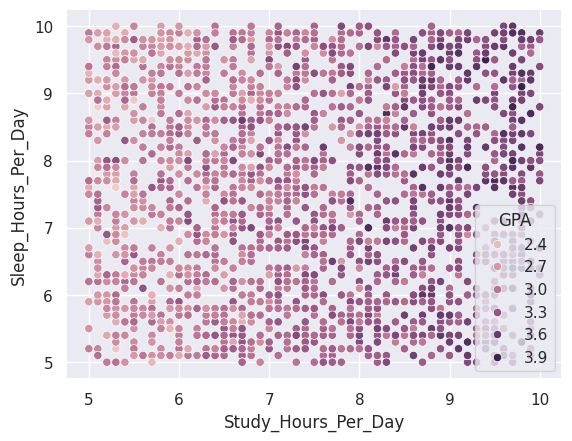

In [4]:
import matplotlib.pyplot as plt


ax = sns.scatterplot(x='Study_Hours_Per_Day', y='Sleep_Hours_Per_Day', hue = 'GPA', data=df)


In [5]:
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']];
Y = df['GPA'].values;

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [7]:
#using a regression model for continuous data, as the gpa values range from 0 to 4
reg_clf = KNeighborsRegressor()
reg_model = reg_clf.fit(X_train, Y_train)
reg_prediction = reg_clf.predict(X_test)

#as we're using a regression model, and not a classifier, the accuracy score is not really a feasible metric for measuring efficacy.This is why we use a MSE value (mean squared error) to make sense of the accuracy of the model
print("Mean Squared Error:", mean_squared_error(reg_prediction, Y_test))
print("R-squared:", r2_score(reg_prediction, Y_test))

Mean Squared Error: 0.043859300000000004
R-squared: 0.2364532675865233


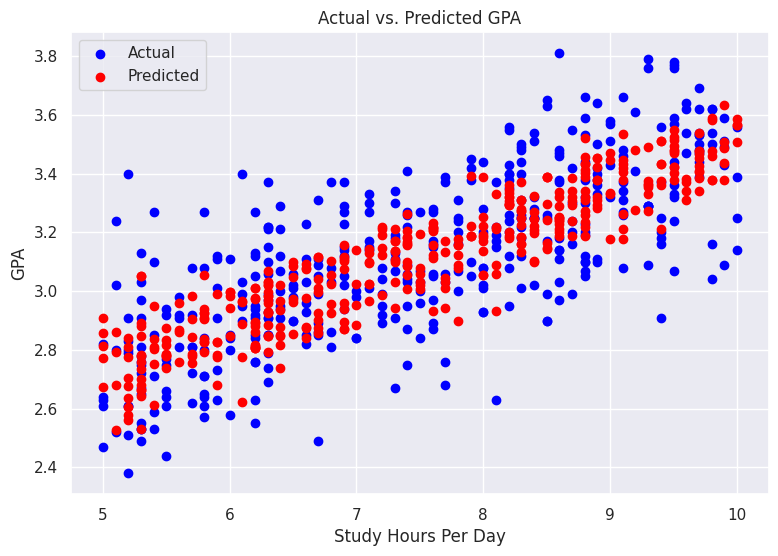

In [8]:
#using matplotlib to plot a graph of the predicted GPA values wrt to the actual gpa values. This graph also gives us useful insight into the kind of distribution the data has. (GPA increases almost linearly with study hours, as obviously it must.)

plt.figure(figsize=(9, 6))
plt.scatter(X_test['Study_Hours_Per_Day'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['Study_Hours_Per_Day'], reg_prediction, color='red', label='Predicted')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.title('Actual vs. Predicted GPA')
plt.legend()
plt.show()

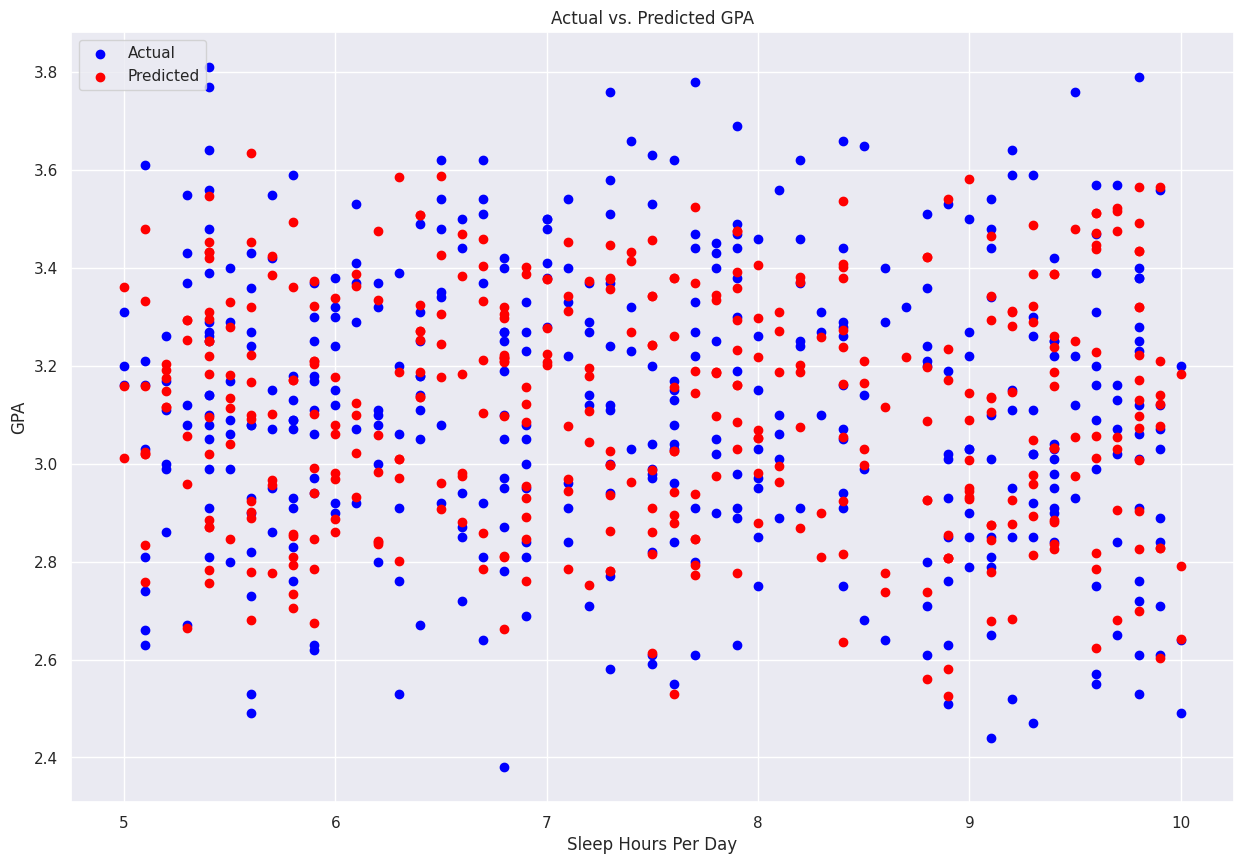

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(X_test['Sleep_Hours_Per_Day'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['Sleep_Hours_Per_Day'], reg_prediction, color='red', label='Predicted')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('GPA')
plt.title('Actual vs. Predicted GPA')
plt.legend()
plt.show()

*less indicative of the relation sleep might have with GPA scores as compared to study hours wrt gpa.*

In [11]:
# as the data distribution looks vaguely linear, we can use a linear regression model to our benefit
linreg_clf = LinearRegression()

#the linear regression model uses a linear equation to predict data.
linreg_model = linreg_clf.fit(X_train, Y_train)
linreg_prediction = linreg_clf.predict(X_test)

#as we're using a regression model, and not a classifier, the accuracy score is not really a feasible metric for measuring efficacy.This is why we use a MSE value (mean squared error) to make sense of the accuracy of the model
print("Mean Squared Error:", mean_squared_error(linreg_prediction, Y_test))
print("R-squared:", r2_score(linreg_prediction, Y_test))

Mean Squared Error: 0.037851601718227386
R-squared: 0.21352960857916936


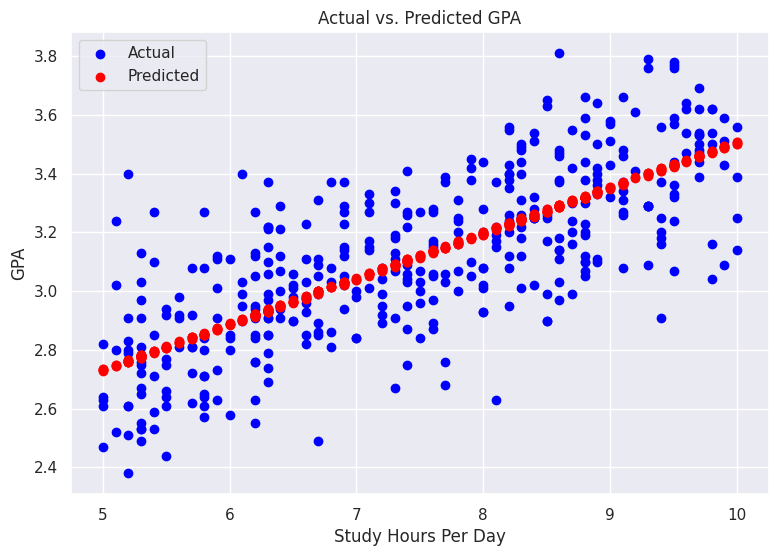

In [12]:
plt.figure(figsize=(9, 6))
plt.scatter(X_test['Study_Hours_Per_Day'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['Study_Hours_Per_Day'], linreg_prediction, color='red', label='Predicted')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.title('Actual vs. Predicted GPA')
plt.legend()
plt.show()